This is an analysis of the Jester Anonymous Ratings Data from jester-data-1.zip from https://goldberg.berkeley.edu/jester-data/. We will explore a little into the data set and then create a recommender system based on a selected joke. The jokes are numbered 1-100.

In [51]:
# import data analysis and visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [34]:
# read the jester excel file, give the columns a representative number since the column names for the jokes was not provided
data = pd.read_excel('jester-data-1.xls',names=(x for x in range(0,101)))

In [35]:
# rename first column for clarity
data.rename(columns={0:'num of ratings'},inplace=True)

In [36]:
data
# null values were indicated as 99.00

,num of ratings,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
1,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
2,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
3,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
4,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24977,100,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,...,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24978,91,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,...,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24979,39,99.00,99.00,99.00,99.00,-7.77,99.00,6.70,-6.75,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
24980,37,99.00,99.00,99.00,99.00,-9.71,99.00,4.56,-8.30,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


In [37]:
data.mean().sort_values(ascending=False).head(5)
# top rated jokes not cleaned from the 99.00 values

num of ratings    72.467417
72                65.510407
73                65.229395
71                64.954139
76                64.782868
dtype: float64

In [38]:
data.replace(to_replace=99,value=np.nan,inplace=True)
# changing the 99.00 null values to NaN

In [41]:
data.mean().sort_values(ascending=False).head(5)
# accurate list of top rated jokes

num of ratings    72.381109
50                 3.665066
89                 3.574720
36                 3.312435
27                 3.189635
dtype: float64

In [44]:
# let's explore the top rated joke, #50
data[50].value_counts().head(10)

5.73    173
8.83    159
7.28    159
6.50    158
5.58    156
9.08    155
4.17    150
5.53    149
9.03    147
8.79    144
Name: 50, dtype: int64

/Users/Aziz/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/Aziz/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0.98, 'Joke #50 - Ratings/Num of ratings')

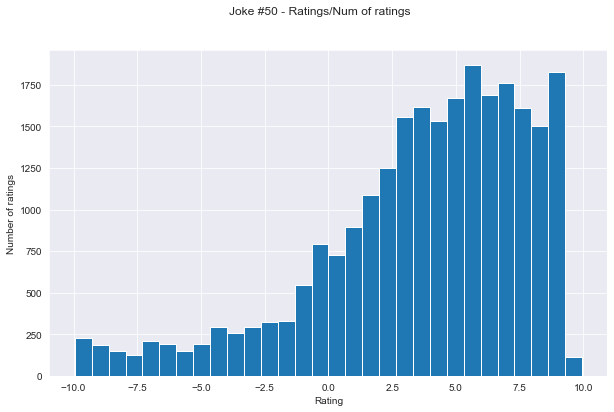

In [57]:
# Visualize the ratings for joke # 50
plt.figure(figsize=(10,6))
plt.hist(data[50],bins=30)
plt.xlabel('Rating')
plt.ylabel('Number of ratings')
plt.suptitle('Joke #50 - Ratings/Num of ratings')

In [58]:
# Create a series showing the correlaton of ratings of joke#50 against the entire dataset
dataCorr = data.corrwith(data[50])

In [61]:
# All jokes correlation with joke#50
dataCorr.sort_values(ascending=False).head(5)

50    1.000000
29    0.425577
35    0.404140
53    0.385832
36    0.384043
dtype: float64

In [70]:
# convert the above data into a dataframe
corr_df = pd.DataFrame(data=dataCorr,columns=['Correlation'])

In [73]:
# drop irrelavant row
corr_df.drop('num of ratings',axis=0,inplace=True)

In [78]:
corr_df.sort_values('Correlation',ascending=False).head(10)

,Correlation
50,1.000000
29,0.425577
35,0.404140
53,0.385832
36,0.384043
56,0.383130
69,0.381587
26,0.376990
32,0.375228
21,0.374838


In [ ]:
# We can see the top 10 jokes which user rated similary to joke #50. The findings indicate a medium-low correlation between them.

In [ ]:
# Let's add count of how many times each joke has been rated

In [99]:
corr_df['ratings count'] = data.drop('num of ratings',axis=1).count()

In [106]:
# Now we can see the top most correlated jokes and how many times they were rated
corr_df.sort_values('Correlation',ascending=False).head(10)

,Correlation,ratings count
50,1.000000,24971
29,0.425577,24933
35,0.404140,24951
53,0.385832,24970
36,0.384043,24964
56,0.383130,24739
69,0.381587,24915
26,0.376990,23749
32,0.375228,24947
21,0.374838,24920
